In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from simglucose.envs import T1DSimEnv
import gym
from gym.envs.registration import register

### Data Exploration

Episode finished after 118 timesteps


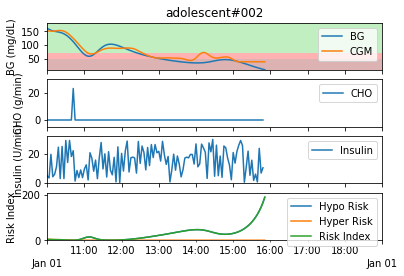

In [9]:
def custom_reward(BG_last_hour):
    if BG_last_hour[-1] > 180:
        return -1
    elif BG_last_hour[-1] < 70:
        return -2
    else:
        return 1


# register(
#     id='simglucose-adolescent2-v0',
#     entry_point='simglucose.envs:T1DSimEnv',
#     kwargs={'patient_name': 'adolescent#002',
#             'reward_fun': custom_reward}
# )

env = gym.make('simglucose-adolescent2-v0')

reward = 1
done = False

observation = env.reset()
for t in range(200):
    env.render(mode='human')
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    # print(observation)
    # print("Reward = {}".format(reward))
    if done:
        print("Episode finished after {} timesteps".format(t + 1))
        break

{'sample_time': 3.0, 'patient_name': 'adolescent#002', 'meal': 12.333333333333334, 'patient_state': array([9.66210275e+03, 3.32641189e+02, 5.01633880e+00, 2.69768774e+02,
       2.51084000e+01, 3.61522423e+02, 6.47059920e+02, 4.39307123e+02,
       1.29072129e+02, 2.26927587e+02, 1.45600752e+04, 1.76216922e+03,
       2.78490131e+02]), 'time': datetime.datetime(2018, 1, 1, 7, 12), 'bg': 152.08090403817195, 'lbgi': 0.0, 'hbgi': 3.1695672771004983, 'risk': 3.1695672771004983}
{'sample_time': 3.0, 'patient_name': 'adolescent#002', 'meal': 22.666666666666668, 'patient_state': array([9.67094526e+03, 2.50770804e+03, 6.90675647e+02, 3.02155650e+01,
       5.86772093e-02, 5.16832761e+03, 1.07287907e+05, 8.98981413e+04,
       5.48581483e+04, 4.31646466e+03, 5.92368847e+04, 4.13179299e+04,
       3.20731281e+01]), 'time': datetime.datetime(2018, 1, 1, 11, 15), 'bg': 17.555488108085754, 'lbgi': 115.35090669842398, 'hbgi': 0.0, 'risk': 115.35090669842398}
Episode finished after 187 timesteps


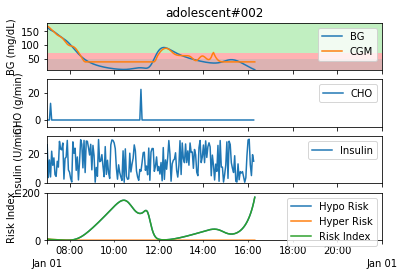

In [16]:
reward = 1
done = False

observation = env.reset()
for t in range(200):
    env.render(mode='human')
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    # print(observation)
    # print("Reward = {}".format(reward))
    if info['meal'] > 0:
        print(info)
    if done:
        print("Episode finished after {} timesteps".format(t + 1))
        break

In [3]:
from simglucose.simulation.env import T1DSimEnv
from simglucose.controller.basal_bolus_ctrller import BBController
from simglucose.sensor.cgm import CGMSensor
from simglucose.actuator.pump import InsulinPump
from simglucose.patient.t1dpatient import T1DPatient
from simglucose.simulation.scenario_gen import RandomScenario
from simglucose.simulation.scenario import CustomScenario
from simglucose.simulation.sim_engine import SimObj, sim, batch_sim
from datetime import timedelta
from datetime import datetime

# specify start_time as the beginning of today
now = datetime.now()
start_time = datetime.combine(now.date(), datetime.min.time())

In [5]:

# --------- Create Custom Scenario --------------
# Create a simulation environment
patient = T1DPatient.withName('adolescent#001')
sensor = CGMSensor.withName('Dexcom', seed=1)
pump = InsulinPump.withName('Insulet')
# custom scenario is a list of tuples (time, meal_size)
scen = [(7, 45), (12, 70), (16, 15), (18, 80), (23, 10)]
scenario = CustomScenario(start_time=start_time, scenario=scen)
env = T1DSimEnv(patient, sensor, pump, scenario)

# Create a controller
controller = BBController()

# Put them together to create a simulation object
s2 = SimObj(env, controller, timedelta(days=1), animate=False, path='./results/')
results2 = sim(s2)


Process ID: 1736
Simulation starts ...
Simulation Completed!


In [6]:
results2

,BG,CGM,CHO,insulin,LBGI,HBGI,Risk
Time,,,,,,,
2023-12-20 00:00:00,149.020000,165.793949,0.0,0.013933,0.000000,2.755276,2.755276
2023-12-20 00:03:00,149.020000,161.582022,0.0,0.013933,0.000000,2.755276,2.755276
2023-12-20 00:06:00,149.020000,159.239373,0.0,0.013933,0.000000,2.755276,2.755276
2023-12-20 00:09:00,149.020000,157.472710,0.0,0.013933,0.000000,2.755276,2.755276
2023-12-20 00:12:00,149.020000,156.108950,0.0,0.013933,0.000000,2.755276,2.755276
...,...,...,...,...,...,...,...
2023-12-20 23:48:00,93.366001,93.736518,0.0,0.013933,1.204979,0.000000,1.204979
2023-12-20 23:51:00,93.288345,92.966818,0.0,0.013933,1.215732,0.000000,1.215732
2023-12-20 23:54:00,93.210068,92.409334,0.0,0.013933,1.226629,0.000000,1.226629


### Solution

- I don't know how to use the variables that the model says or if we even have that information available.
- For the moment the loop is only over one patient, not properly training yet
- Implement reward function

In [2]:
# Define the Q-network
class QNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super(QNetwork, self).__init__()
        # Define your neural network architecture
        self.fc = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.fc(x)

##### select_action funtion

1. The chosen action $a_t$ represents a percentage modulation $alpha_t$ of the mealtime insulin dose suggested by the standard therapy.
2. The modulation factor $alpha_t$) is randomly chosen from a set of possible percentage modulations.
3. The insulin amount suggested by the DDQN algorithm at time step $t$ is calculated using the formula: $BC_{ddqn}(t) = BC_s(t) + \alpha_t \cdot BC_s(t)$.

In [3]:
# Define the DDQ Agent
class DQNAgent:
    def __init__(self, input_size, output_size, gamma=0.99, learning_rate=0.001):
        self.gamma = gamma
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        # Q-networks
        self.q_network = QNetwork(input_size, output_size).to(self.device)
        self.target_q_network = QNetwork(input_size, output_size).to(self.device)
        self.target_q_network.load_state_dict(self.q_network.state_dict())

        # Optimizer
        self.optimizer = optim.Adam(self.q_network.parameters(), lr=learning_rate)

    def select_action(self, state):
        state_tensor = torch.FloatTensor(state).unsqueeze(0).to(self.device)
        q_values = self.q_network(state_tensor)
        action_index = q_values.argmax(1).item()
        # Possible percentage modulations of the insulin dose
        modulation_percentages = [25, 20, 10, 0, -10, -20, -25]
        # now selecting the alpha percentage as a random choice from the modulation percentages
        alpha_percentage = np.random.choice(modulation_percentages)
        alpha_factor = 1 + (alpha_percentage / 100.0)  # Convert percentage to a factor

        # Apply the modulation to the insulin dose suggested by standard therapy (BCs)
        action_value = alpha_factor * action_index

        return action_value

    def update_q_network(self, state, action, reward, next_state, done):
        state_tensor = torch.FloatTensor(state).to(self.device)
        next_state_tensor = torch.FloatTensor(next_state).to(self.device)
        action_tensor = torch.FloatTensor([action]).to(self.device)
        reward_tensor = torch.FloatTensor([reward]).to(self.device)

        # Q-value prediction for all actions
        q_values = self.q_network(state_tensor)
        
        # Action_tensor and q_values shapes must match
        action_tensor = action_tensor.expand_as(q_values)

        # Q-value for the selected action
        selected_q_value = torch.sum(q_values * action_tensor, dim=0, keepdim=True)

        with torch.no_grad():
            # Double Q-learning: Use the target network for action selection
            next_q_values = self.target_q_network(next_state_tensor)
            next_action_index = next_q_values.argmax(0, keepdim=True)
            target_q_values = reward_tensor + self.gamma * next_q_values.gather(0, next_action_index) * (1 - done)

        # Q-network loss
        loss = nn.functional.mse_loss(selected_q_value, target_q_values)

        # Backpropagation and optimization
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def update_target_q_network(self):
        # Update the target Q-network by copying the parameters from the current Q-network
        self.target_q_network.load_state_dict(self.q_network.state_dict())

In [4]:
# Simglucose environment setup
patient_name = "adolescent#010"
env = T1DSimEnv(patient_name=patient_name)

# DDQ Agent setup
state_size = len(env.observation_space.low)  # Size of the state vector
action_size = len(env.action_space.low)  # Size of the action space
agent = DQNAgent(input_size=state_size, output_size=action_size)

In [5]:
state = env.reset()
action = agent.select_action(state)
env.step(action)

Step(observation=Observation(CGM=149.80502445158902), reward=0.21085887551353366, done=False, info={'sample_time': 3.0, 'patient_name': 'adolescent#010', 'meal': 0.0, 'patient_state': array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.69891197e+02,
        1.65975038e+02,  6.30215227e+00, -1.33136366e-02,  1.08236338e+02,
        1.08239971e+02,  3.58486790e+00,  8.84671285e+01,  7.75725653e+01,
        2.72581852e+02]), 'time': datetime.datetime(2018, 1, 1, 15, 3), 'bg': 147.92056439066695, 'lbgi': 0.0, 'hbgi': 2.611626127620977, 'risk': 2.611626127620977})

In [11]:
# Training loop
num_episodes = 1000
TARGET_UPDATE_FREQUENCY = 10
for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0
    first_iteration = True

    while True:
        action = agent.select_action(state)

        # Step through the environment
        next_state, reward, done, _ = env.step(action)

        # Update Q-network
        agent.update_q_network(state, action, reward, next_state, done)

        # Update target Q-network periodically
        if episode % TARGET_UPDATE_FREQUENCY == 0:
            agent.update_target_q_network()

        state = next_state
        total_reward += reward

        if done:
            break

    print(f"Episode: {episode + 1}, Total Reward: {total_reward}, GCM: {next_state.CGM}")

Episode: 1, Total Reward: -97.87264021170513, GCM: 593.3493234822606
Episode: 2, Total Reward: -97.30607057598033, GCM: 600.0
Episode: 3, Total Reward: -96.29777539036654, GCM: 600.0
Episode: 4, Total Reward: -92.08636765128593, GCM: 598.7223567284018
Episode: 5, Total Reward: -94.87752929811349, GCM: 597.4718313861013
Episode: 6, Total Reward: -95.176758063922, GCM: 595.0771923357318
Episode: 7, Total Reward: -95.27126757951615, GCM: 600.0


Traceback (most recent call last):
capi_return is NULL
Call-back cb_fcn_in___user__routines failed.
  File "/opt/anaconda3/lib/python3.9/site-packages/simglucose/patient/t1dpatient.py", line 170, in model
Fatal Python error: F2PySwapThreadLocalCallbackPtr: F2PySwapThreadLocalCallbackPtr: PyLong_AsVoidPtr failed
Python runtime state: initialized
    Kmt = params.Km0
  File "/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py", line 6201, in __getattr__
    and self._info_axis._can_hold_identifiers_and_holds_name(name)
  File "/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py", line 5414, in _can_hold_identifiers_and_holds_name
    is_object_dtype(self.dtype)
  File "/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/common.py", line 165, in is_object_dtype
    return _is_dtype_type(arr_or_dtype, classes(np.object_))
KeyboardInterrupt


Episode: 8, Total Reward: -95.31375314585537, GCM: 597.2737141061987


: 

In [7]:
import datetime

# Assuming 'env' is your SimGlucose environment
env = T1DSimEnv()

# Reset the environment to get the initial state
initial_observation = env.reset()

# Take a step in the environment
action = agent.select_action(initial_observation)
next_observation, reward, done, info = env.step(action)

# Access information from the 'info' dictionary
cgm_measurement = next_observation.CGM
blood_glucose = info['bg']
current_time = info['time']
meal_time = info['meal']

# Print or use the information as needed
print(f"CGM Measurement: {cgm_measurement}")
print(f"Blood Glucose: {blood_glucose}")
print(f"Current Time: {current_time}")
print(f"Meal Time: {meal_time}")


CGM Measurement: 161.3944732729466
Blood Glucose: 154.13309589916958
Current Time: 2018-01-01 11:03:00
Meal Time: 0.0
